In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
gdp_df = pd.read_csv('C:/Users/joshc/Documents/NSS/python/projects/un_data-joshcb88/data/gdp_percapita.csv')
gdp_df.head()


,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN


How many rows and columns are in `gdp_df`? What are the data types of each column?

In [3]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7176 non-null   object 
 1   Year             7176 non-null   int64  
 2   Value            7176 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 224.4+ KB


Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'

In [4]:
gdp_df=gdp_df.drop(columns=['Value Footnotes'])
gdp_df.columns
gdp_df.columns=['Country','Year','GDP_Per_Capita']
gdp_df.head()


,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978


How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

'All years=205

Somalia and Djibouti have the most years missing'

In [5]:
country=gdp_df['Year']
country.value_counts().info()

<class 'pandas.core.series.Series'>
Int64Index: 31 entries, 2018 to 1990
Series name: Year
Non-Null Count  Dtype
--------------  -----
31 non-null     int64
dtypes: int64(1)
memory usage: 496.0 bytes


In [6]:
countries_gdp_count=gdp_df.Country.value_counts().to_frame()
countries_gdp_count

,Country
Least developed countries: UN classification,31
Niger,31
Middle East & North Africa (IDA & IBRD),31
Middle income,31
Mongolia,31
...,...
Kosovo,13
Turks and Caicos Islands,10
Sint Maarten (Dutch part),10
Somalia,8


In [7]:
countries_gdp_count=countries_gdp_count.reset_index()
countries_gdp_count

,index,Country
0,Least developed countries: UN classification,31
1,Niger,31
2,Middle East & North Africa (IDA & IBRD),31
3,Middle income,31
4,Mongolia,31
...,...,...
237,Kosovo,13
238,Turks and Caicos Islands,10
239,Sint Maarten (Dutch part),10
240,Somalia,8


In [8]:
countries_gdp_count.columns = ['Country', 'Num_Years']
countries_gdp_count.head()

,Country,Num_Years
0,Least developed countries: UN classification,31
1,Niger,31
2,Middle East & North Africa (IDA & IBRD),31
3,Middle income,31
4,Mongolia,31


In [9]:
countries_all_years= countries_gdp_count.query('Num_Years==31')
countries_all_years.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    205 non-null    object
 1   Num_Years  205 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.8+ KB


In [10]:
countries_not_all_years= countries_gdp_count.query('Num_Years<31')
countries_not_all_years

,Country,Num_Years
205,Turkmenistan,30
206,Hungary,30
207,Slovak Republic,29
208,Cambodia,28
209,West Bank and Gaza,27
210,Bosnia and Herzegovina,27
211,Slovenia,26
212,Latvia,26
213,Israel,26
214,Lithuania,26


In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [11]:
gdp_df_2020=gdp_df.loc[gdp_df['Year'] == 2020]
gdp_df_2020

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
19,Africa Eastern and Southern,2020,3491.978104
50,Africa Western and Central,2020,4021.293919
81,Albania,2020,13253.733337
112,Algeria,2020,10735.382539
...,...,...,...
7025,Vietnam,2020,10338.270543
7056,West Bank and Gaza,2020,5402.538773
7083,World,2020,16269.969854
7114,Zambia,2020,3277.816510


C:\Users\joshc\AppData\Local\Temp\ipykernel_23180\4189653390.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( a=gdp_df_2020["GDP_Per_Capita"], hist=True, kde=False, rug=False )


<Axes: xlabel='GDP_Per_Capita'>

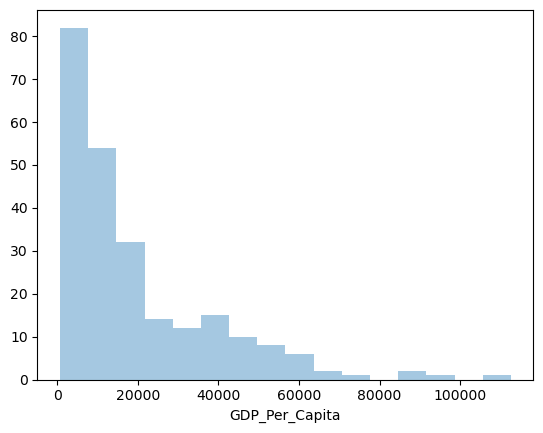

In [12]:
sns.distplot( a=gdp_df_2020["GDP_Per_Capita"], hist=True, kde=False, rug=False )

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

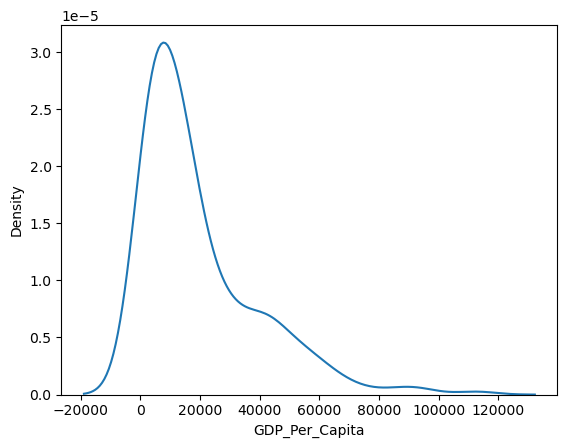

In [13]:
sns.kdeplot(gdp_df_2020['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

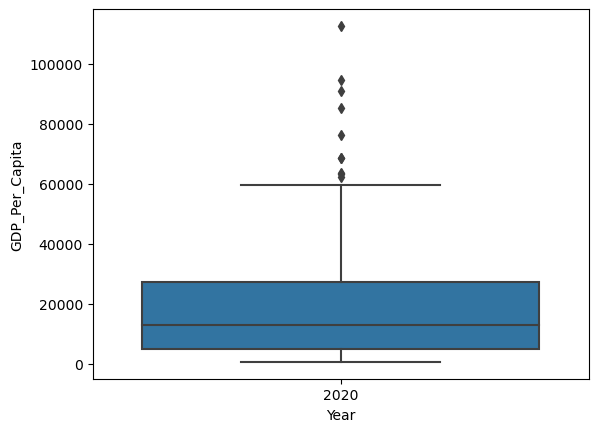

In [14]:
sns.boxplot( x=gdp_df_2020["Year"], y=gdp_df_2020["GDP_Per_Capita"] )

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

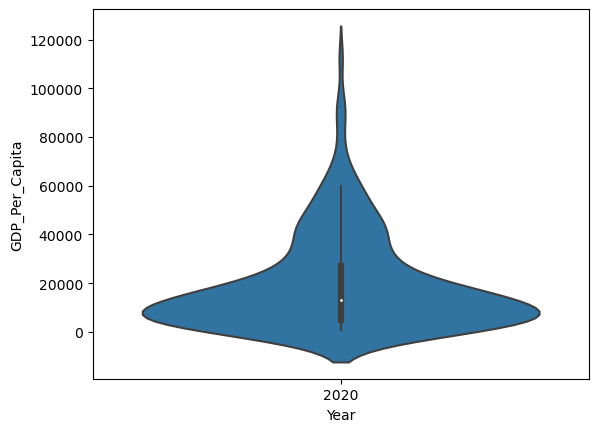

In [15]:
sns.violinplot(x=gdp_df_2020["Year"], y=gdp_df_2020["GDP_Per_Capita"])

##What was the median GDP per capita value in 2020?

In [16]:
gdp_df_2020['GDP_Per_Capita'].median()

12908.9374056206

For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [17]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


In [18]:
gdp_1990=gdp_df.loc[gdp_df['Year']==1990]
gdp_1990

,Country,Year,GDP_Per_Capita
49,Africa Eastern and Southern,1990,3083.976800
80,Africa Western and Central,1990,2810.341129
111,Albania,1990,4827.034551
142,Algeria,1990,8746.340762
173,Angola,1990,5758.950488
...,...,...,...
7024,Vanuatu,1990,2855.554643
7055,Vietnam,1990,2066.372215
7113,World,1990,9704.621768
7144,Zambia,1990,2190.181724


In [19]:
gdp_2000=gdp_df.loc[gdp_df['Year']==2000]
gdp_2000

,Country,Year,GDP_Per_Capita
39,Africa Eastern and Southern,2000,2915.472987
70,Africa Western and Central,2000,2690.555839
101,Albania,2000,5892.590548
132,Algeria,2000,8710.444074
163,Angola,2000,4707.954625
...,...,...,...
7045,Vietnam,2000,3649.242659
7076,West Bank and Gaza,2000,4503.248860
7103,World,2000,11140.090244
7134,Zambia,2000,1990.858991


In [20]:
gdp_2010=gdp_df.loc[gdp_df['Year']==2010]
gdp_2010

,Country,Year,GDP_Per_Capita
10,Afghanistan,2010,1957.029070
29,Africa Eastern and Southern,2010,3545.205203
60,Africa Western and Central,2010,3794.179490
91,Albania,2010,10749.481671
122,Algeria,2010,10970.692420
...,...,...,...
7035,Vietnam,2010,6285.144918
7066,West Bank and Gaza,2010,5411.066482
7093,World,2010,13964.866191
7124,Zambia,2010,3125.528849


In [21]:
gdp_decades = pd.concat([gdp_1990, gdp_2000,gdp_2010,gdp_df_2020])
gdp_decades

,Country,Year,GDP_Per_Capita
49,Africa Eastern and Southern,1990,3083.976800
80,Africa Western and Central,1990,2810.341129
111,Albania,1990,4827.034551
142,Algeria,1990,8746.340762
173,Angola,1990,5758.950488
...,...,...,...
7025,Vietnam,2020,10338.270543
7056,West Bank and Gaza,2020,5402.538773
7083,World,2020,16269.969854
7114,Zambia,2020,3277.816510


In [22]:
type(gdp_decades)

pandas.core.frame.DataFrame

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

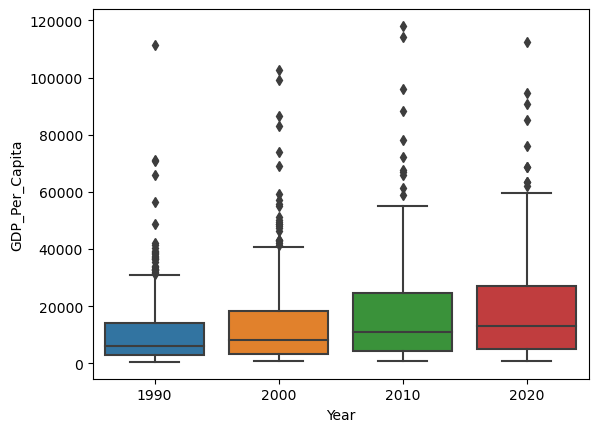

In [23]:
sns.boxplot( x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"] )

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

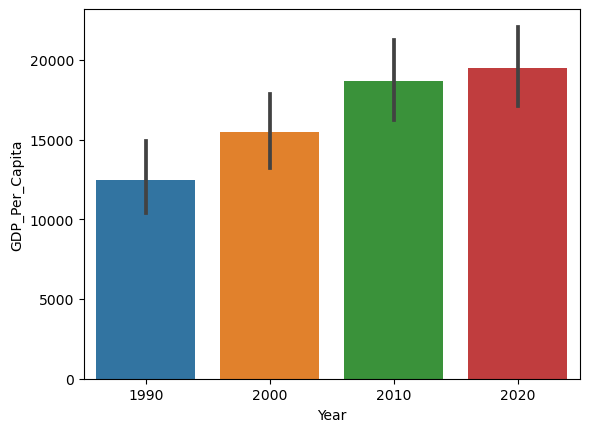

In [24]:
sns.barplot(x='Year',y='GDP_Per_Capita',data=gdp_decades)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

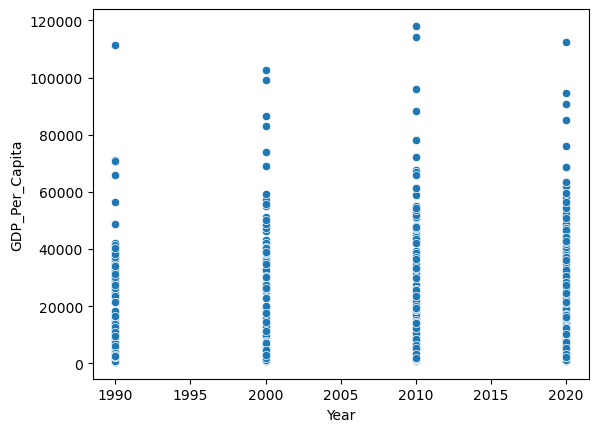

In [25]:
sns.scatterplot(x='Year',y='GDP_Per_Capita',data=gdp_decades)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

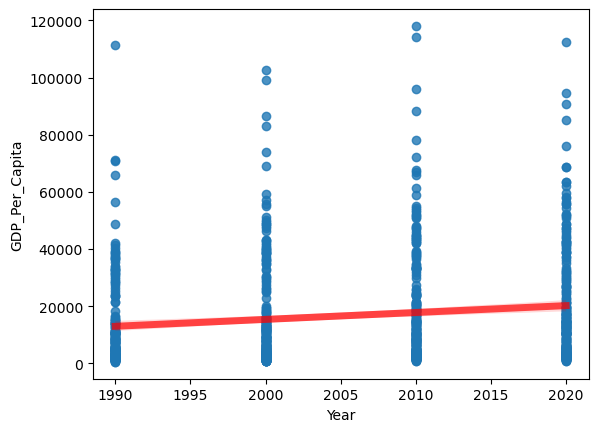

In [26]:
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"], line_kws={"color":"r","alpha":0.7,"lw":5})

Which country was the first to have a GDP per capita greater than $100,000?

'United Emirates'

In [27]:
gdp_decades_over_100000=gdp_df.loc[gdp_df['GDP_Per_Capita']>100000]
gdp_decades_over_100000.sort_values(by='Year',ascending=True)

,Country,Year,GDP_Per_Capita
6838,United Arab Emirates,1990,111454.055665
6837,United Arab Emirates,1991,106103.552655
6836,United Arab Emirates,1992,103470.924576
6834,United Arab Emirates,1994,100213.156226
6833,United Arab Emirates,1995,101570.992100
6832,United Arab Emirates,1996,102211.638844
6831,United Arab Emirates,1997,105108.996265
6830,United Arab Emirates,1998,100100.435658
6828,United Arab Emirates,2000,102494.714624
3901,Luxembourg,2001,101143.147977


Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [28]:
gdp_df_2020.sort_values(by="GDP_Per_Capita",ascending=False)

,Country,Year,GDP_Per_Capita
3882,Luxembourg,2020,112557.309472
5720,Singapore,2020,94505.636160
3071,Ireland,2020,90789.221024
5381,Qatar,2020,85290.450430
639,Bermuda,2020,76105.138057
...,...,...,...
4750,Niger,2020,1221.269930
5871,Somalia,2020,1180.965971
1524,Dem. Rep. Congo,2020,1082.445242
1136,Central African Republic,2020,937.856470


In [29]:
gd_highest=gdp_df.loc[gdp_df['Country']=='Luxembourg']
gd_highest

,Country,Year,GDP_Per_Capita
3882,Luxembourg,2020,112557.309472
3883,Luxembourg,2019,116518.276815
3884,Luxembourg,2018,115049.926079
3885,Luxembourg,2017,114985.842236
3886,Luxembourg,2016,116283.699681
3887,Luxembourg,2015,113182.728563
3888,Luxembourg,2014,113313.578898
3889,Luxembourg,2013,113050.663254
3890,Luxembourg,2012,112137.135491
3891,Luxembourg,2011,112998.390477


Text(0.5, 1.0, 'Luxembourg GDP 1990-2020')

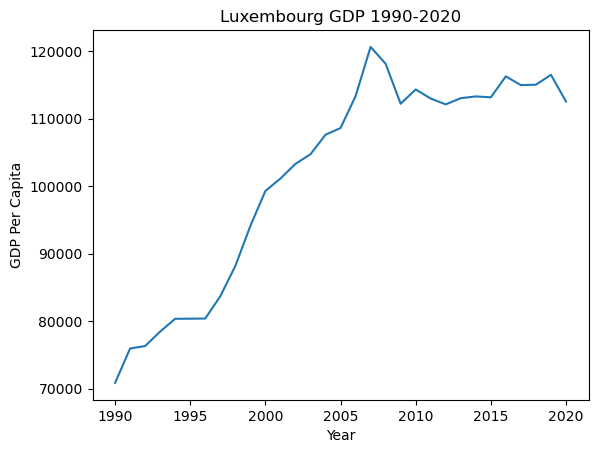

In [30]:
plt.plot('Year','GDP_Per_Capita',data=gd_highest)
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.title('Luxembourg GDP 1990-2020')

Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [31]:
gdp_df_2020.sort_values(by="GDP_Per_Capita",ascending=True)

,Country,Year,GDP_Per_Capita
914,Burundi,2020,731.064074
1136,Central African Republic,2020,937.856470
1524,Dem. Rep. Congo,2020,1082.445242
5871,Somalia,2020,1180.965971
4750,Niger,2020,1221.269930
...,...,...,...
639,Bermuda,2020,76105.138057
5381,Qatar,2020,85290.450430
3071,Ireland,2020,90789.221024
5720,Singapore,2020,94505.636160


In [32]:
gd_lowest=gdp_df.loc[gdp_df['Country']=='Burundi']
gd_lowest

,Country,Year,GDP_Per_Capita
914,Burundi,2020,731.064074
915,Burundi,2019,751.443405
916,Burundi,2018,761.524143
917,Burundi,2017,773.572859
918,Burundi,2016,794.604340
919,Burundi,2015,825.205574
920,Burundi,2014,886.235296
921,Burundi,2013,877.272857
922,Burundi,2012,862.715651
923,Burundi,2011,852.502576


Text(0.5, 1.0, 'Burundi GDP 1990-2020')

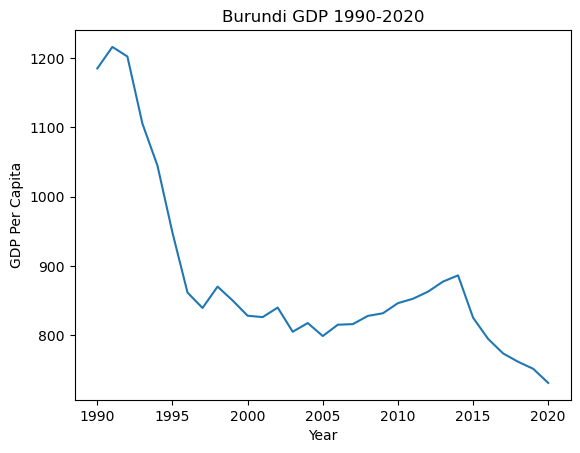

In [33]:
plt.plot('Year','GDP_Per_Capita',data=gd_lowest)
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.title('Burundi GDP 1990-2020')

Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [34]:
internet_df = pd.read_csv('../data/internet_use.csv',nrows=4495)
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
...,...,...,...,...
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN


Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [35]:
internet_df=internet_df.drop(columns=['Value Footnotes'])
internet_df.columns
internet_df.columns=['Country','Year','Internet_Users_Pct']
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


Look at the number of observations in this dataset per year. What do you notice?

'As the year decreases the Internet Users Pct in turn does so as well. Also there was a big surge in 1990 with the dot com explosion'

In [36]:
internet_df['Year'].value_counts()

1990    210
2011    207
2007    206
2008    204
2012    203
2010    203
2009    203
2014    202
2013    202
2002    202
2005    201
2001    201
2006    200
2000    199
2004    199
1999    198
2003    196
1998    190
1997    184
1996    175
1995    138
1994     91
1993     65
1992     50
1991     39
1989      8
1980      7
1965      7
1970      7
1975      7
1976      7
1977      7
1978      7
1979      7
1982      7
1981      7
1983      7
1984      7
1985      7
1986      7
1987      7
1988      7
1960      7
Name: Year, dtype: int64

What is the first year to have a non-zero internet users percentage value?
'Italy-1990'

In [37]:
internet_df_first_year=internet_df.loc[internet_df['Internet_Users_Pct']!=0.00]
internet_df_first_year.sort_values(by='Year', ascending=True)

,Country,Year,Internet_Users_Pct
2048,Italy,1990,0.017545
1107,Denmark,1990,0.097277
375,Belgium,1990,0.001007
1388,Finland,1990,0.401088
4301,United States,1990,0.784729
...,...,...,...
2175,Kiribati,2014,12.250000
848,Colombia,2014,52.570000
1299,Ethiopia,2014,2.900000
623,Burundi,2014,1.380000


How does the distribution of internet users percent differ for 2000 and 2014?

In [38]:
internet_df_years=internet_df.loc[internet_df['Year'].isin([2000,2014])]
internet_df_years

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
15,Albania,2014,60.100000
29,Albania,2000,0.114097
36,Algeria,2014,18.090000
50,Algeria,2000,0.491706
...,...,...,...
4445,Yemen,2000,0.082500
4451,Zambia,2014,17.340000
4465,Zambia,2000,0.191072
4473,Zimbabwe,2014,19.890000


<Axes: xlabel='Year', ylabel='Internet_Users_Pct'>

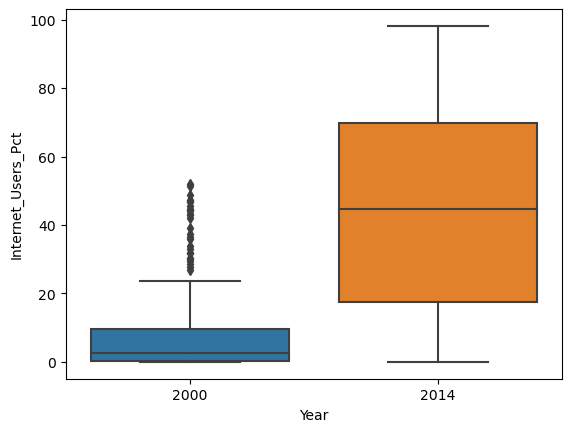

In [39]:
sns.boxplot( x=internet_df_years["Year"], y=internet_df_years["Internet_Users_Pct"] )

For how many countries was the percentage of internet users below 5% in 2014?
'16'

In [40]:
internet_df_2014=internet_df.loc[(internet_df.Internet_Users_Pct<5)&(internet_df.Year==2014)]
internet_df_2014.count()

Country               16
Year                  16
Internet_Users_Pct    16
dtype: int64

Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [41]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df
                               ,how = 'outer')
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
...,...,...,...,...
8251,Yemen,1999,NaN,0.056629
8252,Yemen,1998,NaN,0.023323
8253,Yemen,1997,NaN,0.015025
8254,Yemen,1996,NaN,0.000621


Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [42]:
internet_df_2014=gdp_and_internet_use.loc[(gdp_and_internet_use['Year']==2014)]
top3_internet=internet_df_2014.nlargest(3,'Internet_Users_Pct')
top3_internet

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2803,Iceland,2014,50450.741612,98.16
645,Bermuda,2014,77361.104881,96.80
4880,Norway,2014,62390.130313,96.30


In [43]:
gdp_countries=gdp_and_internet_use.loc[(gdp_and_internet_use['Country']).isin(['Iceland','Bermuda','Norway'])]
gdp_countries

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
639,Bermuda,2020,76105.138057,NaN
640,Bermuda,2019,81681.726668,NaN
641,Bermuda,2018,81423.408453,NaN
642,Bermuda,2017,81834.955874,NaN
643,Bermuda,2016,78149.352535,NaN
...,...,...,...,...
7670,Iceland,1994,NaN,6.794812
7671,Iceland,1993,NaN,2.667825
7672,Iceland,1992,NaN,1.539160
7673,Iceland,1991,NaN,0.505129


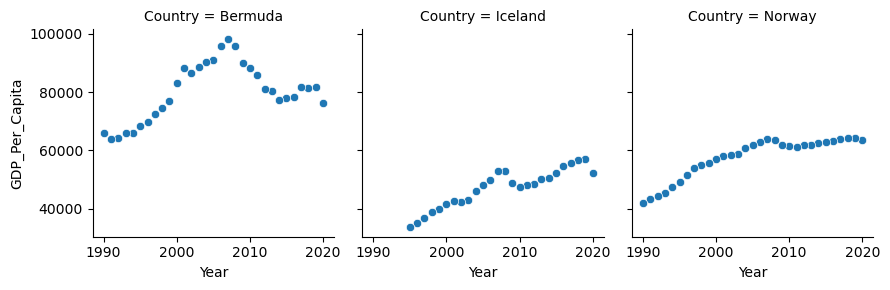

In [60]:
graph_top_3=sns.FacetGrid(gdp_countries,col="Country")
graph_top_3.map(sns.scatterplot, "Year", "GDP_Per_Capita")
graph_top_3

Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [50]:
gdp_and_internet_use_2014=gdp_and_internet_use.loc[(gdp_and_internet_use['Year']==2014)]
gdp_and_internet_use_2014.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6,Afghanistan,2014,2102.384604,6.39
25,Africa Eastern and Southern,2014,3677.319414,NaN
56,Africa Western and Central,2014,4215.646000,NaN
87,Albania,2014,11586.833878,60.10
118,Algeria,2014,11512.690472,18.09


Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

Text(0, 0.5, 'GDP_Per_Capita')

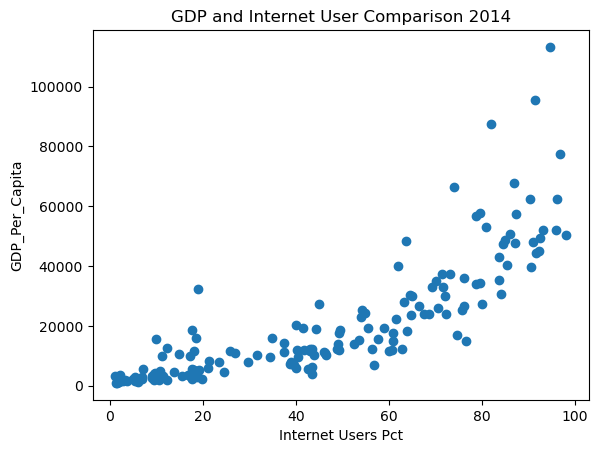

In [52]:
plt.scatter(gdp_and_internet_use_2014['Internet_Users_Pct'], gdp_and_internet_use_2014['GDP_Per_Capita'])
plt.title('GDP and Internet User Comparison 2014')
plt.xlabel('Internet Users Pct')
plt.ylabel('GDP_Per_Capita')